In [1]:
%matplotlib inline
import altair as alt
import pandas as pd

## Aims
The aim of this notebook is to analyze our RSVP data and see which schools I have to encourage to send more e-mails to their listservs.

In [2]:
df = pd.read_csv('rsvp_data.csv')
df['time'] = pd.to_datetime(df['time'])
df.head()

,rsvp_no,time,institution
0,1,2019-03-07 16:58:00,Non-academic Institution
1,2,2019-03-14 19:11:00,Other
2,3,2019-03-18 14:28:00,Non-academic Institution
3,4,2019-03-19 16:33:00,CUNY
4,5,2019-03-19 16:45:00,CUNY


In [3]:
df['counts'] = df.groupby('institution').cumcount()+1

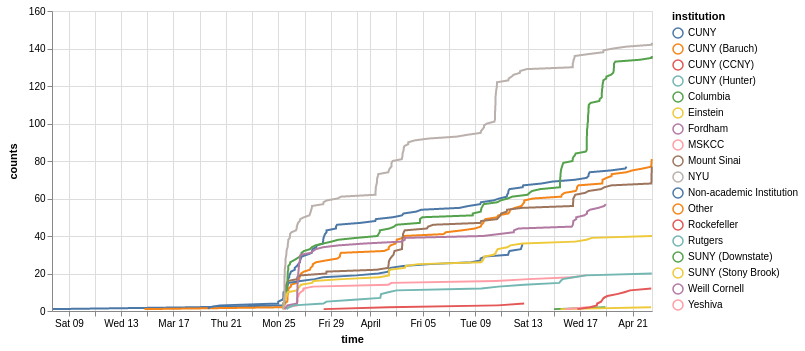

In [4]:
alt.Chart(df).properties(width=600).mark_line().encode(
    x='time',
    y='counts',
    color='institution'
)

We used this information around April 11th to motivate additional advertising efforts by Columbia and other schools. 
What we had noticed was that after weeks of advertising, one clickbaity e-mail at NYU still brought in a huge upwards spike in RSVPs (around 10th of April), meaning that the common fear of over-exposing a target audience to ads would diminish their willingness to RSVP for the conference. 

We can tell that NYU was bringing the most RSVPs on April 11th, but we the colleagues at Columbia were able to close the gap. One also has to consider that CUNY was split up into different labels, so combined they would actually come out on top.

### When were the biggest spikes in signups/ e-mail blasts

The aim here is to have some fun with the numbers to estimate when each university received e-mail blasts, by looking at the differential in signups over time. 

We will make use of the following solution:

https://stackoverflow.com/questions/41780489/python-pandas-how-to-calculate-derivative-gradient

In [5]:
dummy = pd.concat((df['rsvp_no'].diff()/ df['time'].diff().dt.total_seconds(), df['time']), axis=1).rename(columns={0:'differential'})
dummy.head()

,differential,time
0,NaN,2019-03-07 16:58:00
1,0.000002,2019-03-14 19:11:00
2,0.000003,2019-03-18 14:28:00
3,0.000011,2019-03-19 16:33:00
4,0.001389,2019-03-19 16:45:00


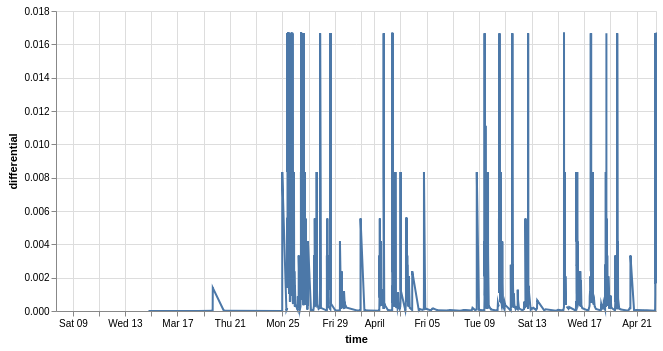

In [6]:
alt.Chart(dummy).properties(width=600).mark_line().encode(
    x='time',
    y='differential'
)

In [7]:
differentials =  df.groupby('institution').apply(
    lambda group: pd.concat([group['time'], group['counts'].diff()/ df['time'].diff().dt.total_seconds()], axis=1)
).reset_index().dropna().rename(columns={0:'differential'})\
.loc[:,['institution', 'time', 'differential']]
differentials.head()

,institution,time,differential
4,CUNY,2019-03-19 16:45:00,0.001389
5,CUNY,2019-03-20 12:58:00,0.000014
6,CUNY,2019-03-24 23:46:00,0.000003
7,CUNY,2019-03-24 23:48:00,0.008333
8,CUNY,2019-03-25 07:25:00,0.000036


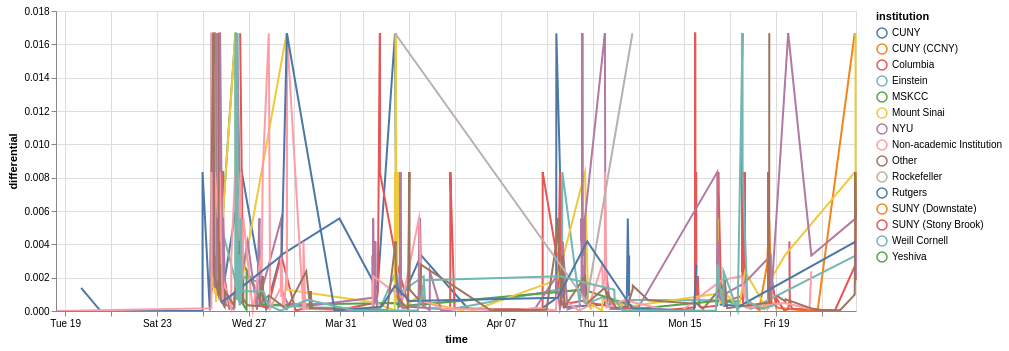

In [8]:
alt.Chart(differentials).properties(width=800).mark_line().encode(
    x='time',
    y='differential',
    color='institution'
)

This is not terribly helpful looking, the only thing we can tell from this is that there are not necessarily many more bursts of NYU signups. 
It would probably be a lot easier to read if I padded the time points. Maybe also a kde would not be a bad idea?

In [9]:
group = df.groupby('institution')

In [10]:
first_institution, first_df = next(iter(df.groupby('institution')))
first_df.head()

,rsvp_no,time,institution,counts
3,4,2019-03-19 16:33:00,CUNY,1
4,5,2019-03-19 16:45:00,CUNY,2
5,6,2019-03-20 12:58:00,CUNY,3
6,7,2019-03-24 23:46:00,CUNY,4
7,8,2019-03-24 23:48:00,CUNY,5


In [11]:
dummy = first_df.set_index('time').reindex(df.time).fillna(method='ffill')
dummy.head(6)

,rsvp_no,institution,counts
time,,,
2019-03-07 16:58:00,NaN,NaN,NaN
2019-03-14 19:11:00,NaN,NaN,NaN
2019-03-18 14:28:00,NaN,NaN,NaN
2019-03-19 16:33:00,4.0,CUNY,1.0
2019-03-19 16:45:00,5.0,CUNY,2.0
2019-03-20 12:58:00,6.0,CUNY,3.0


In [12]:
first_df.set_index('time').reindex(df.time)

,rsvp_no,institution,counts
time,,,
2019-03-07 16:58:00,NaN,NaN,NaN
2019-03-14 19:11:00,NaN,NaN,NaN
2019-03-18 14:28:00,NaN,NaN,NaN
2019-03-19 16:33:00,4.0,CUNY,1.0
2019-03-19 16:45:00,5.0,CUNY,2.0
2019-03-20 12:58:00,6.0,CUNY,3.0
2019-03-24 23:46:00,7.0,CUNY,4.0
2019-03-24 23:48:00,8.0,CUNY,5.0
2019-03-25 07:25:00,9.0,CUNY,6.0


In [13]:
nyu = df.groupby('institution').get_group('NYU').set_index('time')#.reindex(df.time)
nyu[nyu.index.duplicated(keep=False)]

,rsvp_no,institution,counts
time,,,
2019-03-25 10:46:00,37,NYU,5
2019-03-25 10:46:00,38,NYU,6
2019-03-25 11:29:00,55,NYU,18
2019-03-25 11:29:00,56,NYU,19
2019-03-25 11:32:00,57,NYU,20
2019-03-25 11:32:00,58,NYU,21
2019-04-10 12:12:00,450,NYU,103
2019-04-10 12:12:00,451,NYU,104


In [19]:
nyu.rolling(pd.tseries.offsets.Hour).counts.mean()

ValueError: passed window <class 'pandas.tseries.offsets.Hour'> is not compatible with a datetimelike index

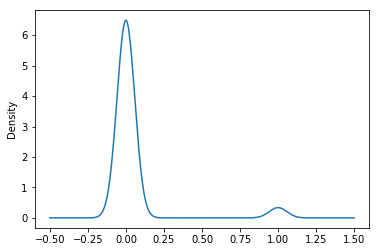

In [13]:
dummy.counts.diff().plot(kind='kde')

### What time of the day do people sign up?

Conventional wisdom has it that people mostly respond to e-mails in the morning but what time of day do people sign up the most?

We do have to take into account here that our results are going to be biased around when we sent e-mails but it might still be interesting to look at.

In [13]:
timedf = df.set_index('time')
timedf.head()

,rsvp_no,institution,counts
time,,,
2019-03-07 16:58:00,1,Non-academic Institution,1
2019-03-14 19:11:00,2,Other,1
2019-03-18 14:28:00,3,Non-academic Institution,2
2019-03-19 16:33:00,4,CUNY,1
2019-03-19 16:45:00,5,CUNY,2


In [18]:
timedf.groupby(timedf.index.floor('d')).head(1)

,rsvp_no,institution,counts
time,,,
2019-03-07 16:58:00,1,Non-academic Institution,1
2019-03-14 19:11:00,2,Other,1
2019-03-18 14:28:00,3,Non-academic Institution,2
2019-03-19 16:33:00,4,CUNY,1
2019-03-20 12:58:00,6,CUNY,3
2019-03-24 23:46:00,7,CUNY,4
2019-03-25 07:25:00,9,CUNY,6
2019-03-26 00:00:00,151,NYU,42
2019-03-27 04:20:00,227,Non-academic Institution,30


In [9]:
df.groupby(df.time.dt.floor('d')).head()

,rsvp_no,time,institution,counts
0,1,2019-03-07 16:58:00,Non-academic Institution,1
1,2,2019-03-14 19:11:00,Other,1
2,3,2019-03-18 14:28:00,Non-academic Institution,2
3,4,2019-03-19 16:33:00,CUNY,1
4,5,2019-03-19 16:45:00,CUNY,2
5,6,2019-03-20 12:58:00,CUNY,3
6,7,2019-03-24 23:46:00,CUNY,4
7,8,2019-03-24 23:48:00,CUNY,5
8,9,2019-03-25 07:25:00,CUNY,6
9,10,2019-03-25 09:05:00,Non-academic Institution,3
